# Task 3

Do people actually care about licensed work or give more preference to feedback rating? – Explore clustering of jobs, accepted offers vs. feedback rating correlation

In [15]:
import pandas as pd
import numpy as np
from statsmodels.regression import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [17]:
file_path = ("at.xlsx")
data = pd.read_excel(file_path, 
                              sheet_name = 'Airtasker')

In [16]:
data.head()

,Name,Address,Licence No.,Position,Licence Number Extracted,Find_Desc,Find_Edu,Find_spec,Find_Exp,Description,Rating,Task Completed,Reviews,Completion Rate,Education,Specialities,Languages,Experience,Transportation,TimeFrame,HasLicence
0,Laszlo M.,"Brighton VIC 3186, Australia",License no. 47917,13.0,47917,electrician,electrician,not electrician,electrician,"Professional plumbing, heating, gas fitter and...",5.0,83,78,0.97,"Plumbing,Electrical","Gas heating,High pressure jetting,Blocked drai...","English,Hungarian,Russian,Hebrew","Plumber,Gasfitter,Heating technician,Electrician",Truck,NaN,1
1,Brad M.,"Gladstone Park VIC, Australia",Licence No. REC-31648\t,17.0,31648\t,electrician,not electrician,electrician,electrician,"Licenced, Registered and Insured Electrician. ...",5.0,93,83,0.96,"A Grade, REC, ABN",Electrician,English,Electrician,Car,"08/05/2021, 18:18:43",1
2,David J.,"Coburg VIC, Australia",Licence No. REC-31209,17.0,31209,electrician,electrician,electrician,electrician,I'm a fully qualified and insured Electrical C...,5.0,16,15,1.00,"Cert III Electrotechnology,Bachelor of Social ...",Electrical tasks,,Electrical,"Online,Walk,Car",NaN,1
3,Minh H.,"Deer Park VIC, Australia",Licence No. REC-31159,17.0,31159,electrician,electrician,electrician,not electrician,Insured Registered Electrician contractor ‚≠êR...,5.0,102,88,0.98,Cert III in Electrotechnology of Electricians,"Electrician,TV mount,Telecommunications Techin...","English,Vietnamese","Domestic, commercial, industrial",Van Hiace,"08/05/2021, 18:18:36",1
4,Daniel F.,"Carrum Downs VIC, Australia",Licence No. REC- 30745,18.0,30745,electrician,not electrician,not electrician,not electrician,"Hi, I‚Äôm a fully licensed A grade electrician...",5.0,510,453,1.00,,,,,,"08/05/2021, 18:20:18",1


In [18]:
data['HasLicence'] = [1 if str(x).strip() != "" else 0 for x in data['Licence Number Extracted']]

Completion Rate = b0 + b1*Rating + b2*HasLicnce + b3*Rating*HasLicence

In [19]:
data['Rating'] = pd.to_numeric(data['Rating'], 
                                        errors ='coerce')
data['Completion Rate'] = pd.to_numeric(data['Completion Rate'], 
                                        errors ='coerce')

data.dropna(subset = ["Rating", "Completion Rate"], inplace=True)
data.reset_index(drop=True, inplace=True)
X = data[['Rating', 'HasLicence']]
y = data['Completion Rate']
y.values.ravel()
X.head()
y.head()

0    0.97
1    0.96
2    1.00
3    0.98
4    1.00
Name: Completion Rate, dtype: float64

In [20]:
X_interaction = PolynomialFeatures(2, 
                                   interaction_only=True, 
                                   include_bias=False).fit_transform(X)

In [21]:
df = pd.DataFrame(X_interaction, 
                              columns = ['Rating','HasLicence',
                                         'Rating:HasLicence'])
df.reset_index(drop=True, inplace=True)
df.head()

,Rating,HasLicence,Rating:HasLicence
0,5.0,1.0,5.0
1,5.0,1.0,5.0
2,5.0,1.0,5.0
3,5.0,1.0,5.0
4,5.0,1.0,5.0


In [22]:
model = linear_model.OLS(y, df).fit()

In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Completion Rate   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              3011.
Date:                Mon, 30 Aug 2021   Prob (F-statistic):                   2.20e-221
Time:                        07:11:06   Log-Likelihood:                          121.93
No. Observations:                 299   AIC:                                     -237.9
Df Residuals:                     296   BIC:                                     -226.8
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Rating                0.1765      0.002     82.781      0.000       0.172       0.181
HasLicence            0.8680      2.689      0.323      0.747      -4.424       6.160
Rating:HasLicence    -0.1612      0.539     -0.299      0.765      -1.222       0.900
==============================================================================
Omnibus:                      172.106   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.027
Skew:                          -2.499   Prob(JB):                    4.38e-190
Kurtosis:                       9.710   Cond. No.                     1.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As p-value of Licence and interaction of rating with licence has above 0.05. It failed to reject the null hypothesis that the coefficient of licence and its interaction with rating is no 0 and not significant. Hence, people do not really care about licensed, they just see completion rating to select the tasker for their job.

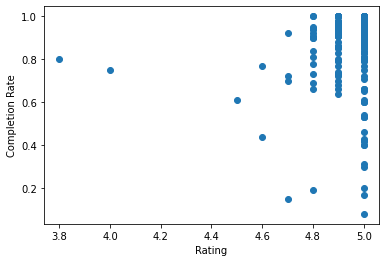

In [24]:
plt.plot(df['Rating'], y, 'o')
plt.xlabel('Rating')
plt.ylabel('Completion Rate')
plt.show()

# Task 4

Electrician suburb clustering

In [27]:
address = data['Address']
address = [x.strip().split(' ')[0] for x in address]
address = [x.replace(',', '').strip() for x in address]

In [28]:
address_list = np.array(address)
unique, counts = np.unique(address_list, return_counts=True)
frequencies = np.array((unique, counts)).T
frequencies = sorted(frequencies, key=lambda x: int(x[1]), reverse=True)
for freq in frequencies:
  print(freq)

['Melbourne' '34']
['Werribee' '7']
['Burwood' '5']
['Carrum' '5']
['Cranbourne' '5']
['Epping' '5']
['Frankston' '5']
['Hawthorn' '5']
['Mill' '5']
['Reservoir' '5']
['South' '5']
['Box' '4']
['Clayton' '4']
['Glen' '4']
['Preston' '4']
['Thornbury' '4']
['Altona' '3']
['Bayswater' '3']
['Bundoora' '3']
['Caroline' '3']
['Clyde' '3']
['Coburg' '3']
['Dandenong' '3']
['Deer' '3']
['Ferntree' '3']
['Geelong' '3']
['Glenroy' '3']
['Greenvale' '3']
['Lynbrook' '3']
['Melton' '3']
['Mitcham' '3']
['Noble' '3']
['North' '3']
['Pakenham' '3']
['Pascoe' '3']
['Richmond' '3']
['Ringwood' '3']
['St' '3']
['Tarneit' '3']
['Armstrong' '2']
['Ballarat' '2']
['Brookfield' '2']
['Brunswick' '2']
['Caulfield' '2']
['Croydon' '2']
['Derrimut' '2']
['Dingley' '2']
['Doncaster' '2']
['Fawkner' '2']
['Gladstone' '2']
['Grovedale' '2']
['Keilor' '2']
['Kew' '2']
['Lalor' '2']
['Maidstone' '2']
['Malvern' '2']
['Moonee' '2']
['Mornington' '2']
['Mount' '2']
['Narre' '2']
['Rowville' '2']
['Sunshine' '2']
[